Уточним задачу:
Нам нужно построить модель которая предскажет вероятность ухода клиента
В форме таблицы id пользователя вероятность ухода 
какую вероятность примем за трешхолд
Нужна ли учитывать затраты на удержание с прибылью которую принесет клиент

contract
если end date filled == target
что случилось в октябре 2019 года
До октября клиенты не закрывали договора?
Первые 4 цифры в ID что значат как присваиваются а вторая часть?
payment_method значим чем отличается(можно ли объеденить), как связан с paperless_billing
type Two year оплата за два года сразу
monthly_charges суммарная стоимость услуг в месяц
total_charges сколько он уже заплатил (проверять (begin - end).month == total/monthly ?)

personal
кто такие 
senior пенсионер
partner  супруга
dependents(иждивенцы)

# Отток клиентов телеком компании

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).  

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

###  Описание данных

Данные состоят из файлов, полученных из разных источников:
* `contract.csv` — информация о договоре;
* `personal.csv` — персональные данные клиента;
* `internet.csv` — информация об интернет-услугах;
* `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

### План работы
1. Загрузка и ознакомление с данными
    + загрузка необходимых библиотек
    + загрузка данных
    + ознакомление и обозначение проблем для этапа предобработки
2. Предварительная обработка данных
    + объединение данных
    + обработка пропусков
    + преобразование типов
    + добавление новых признаков
3. Исследовательский анализ
    + проверка распределений данных
    + проверка зависимостей целевой переменной
    + формирование и проверка гипотез
4. Подготовка и обучение модели
    + разбиение данных на тренировочную и тестовую выборки
    + создание несколько моделей (pipeline c CV)
    + обучение и определение лучшей модели
5. Проверка работы модели
    + проверка на тестовой выборке
    + анализ результатов работы модели
6. Вывод
    + вывод
    + параметры финальной модели

### Критерии оценки работы

Основная метрика: **AUC-ROC**\
Дополнительная метрика: **Accuracy**\
Критерии оценки: **AUC-ROC >= 0.85**


## Загрузка и ознакомление с данными

Загрузим необходимые библиотеки

In [11]:
import os
import re
import matplotlib as plt
import numpy as np
import pandas as pd

Зафиксируем глобальные переменные

In [12]:
MY_DIR = 'data'
YA_DIR = '/datasets/final_provider/'
RANDOM_STATE = 270223

Считаем данные

In [13]:
def search_and_var_naming(dir):
    """
    Search all *.csv files in dir and creat dic varname:filepath
    dir -- directory with data
    sep -- win/lin filepath sep
    """
    csv_files = {}
    for root, dirs, files in os.walk(dir):
        counter = 0
        for file in files:
            if file.endswith(".csv"):
                counter += 1
                csv_files[file.split('.')[0]] = dir + os.sep + file
        if counter == 0:
            print('В папке отсутствуют файлы формата *.csv')
        else:
            print(f'Количество найденных файлов *.csv: {counter}')
    return csv_files

In [14]:
if os.path.exists(MY_DIR):
    print('Используется локальная папка')
    files_and_path = search_and_var_naming(MY_DIR)
elif os.path.exists(YA_DIR):
    print('Используется репозиторий Yandex')    
    files_and_path = search_and_var_naming(YA_DIR)
else:
    print('Папка с данными не найдена')

Используется локальная папка
Количество найденных файлов *.csv: 4


Преобразуем и присвоим найденным файлам имена в соответствии с их названием

In [15]:
for key in files_and_path:
    exec(f'{key} = pd.read_csv(files_and_path[key])')
    print(key)

contract
internet
personal
phone


In [16]:
files = [contract, internet, personal, phone]

Преобразуем имена колонок в snake_case

In [17]:
for file in files:
    new_columns_name=[]
    for column in file.columns:
        new_columns_name.append(re.sub('(?!^)([A-Z]+)', r'_\1', column).lower())
    file.columns = new_columns_name

### Последовательно изучим общую информацию о всех представленных данных

#### contract

In [51]:
def base_info(df):
    print('Head')
    display(df.head())
    print('*'*120)
    print('Tail')
    display(df.tail())
    print('*'*120)   
    print('Info')
    df.info()
    print('*'*120)
    print('Describe')
    display(df.describe(include='all'))


In [52]:
base_info(contract)

Head


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


************************************************************************************************************************
Tail


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


************************************************************************************************************************
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
************************************************************************************************************************
Describe


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


Явные пропуски отсутствуют. 
+ `begin_date` - необходимо будет преобразовать в формат даты и при анализе проверить утверждение, чем более долгий срок клиент с компанией тем меньшая вероятность его ухода
+ `end_date` - целевой признак, если клиент ушел дата будет обозначена также необходимо преобразовать в формат даты, и преобразовать с `begin_date` в срок обслуживания
+ `total_charges` - проверим на пропуски и преобразуем в числовой
+ `monthly_charges` - тип данных ожидаемый, проверим если средний чек совпадает 'кол-во месяцев' / `total_charges` == `monthly_charges`, то клиент не увеличивал кол-во услуг, меньше -> отказывался, больше -> добавлял

Количество уникальных ID совпадает с количеством строк, следовательно полные дубликаты отсутствуют. Попробывать разбить преобразовать в хэш текстовую часть а цифровую посмотреть может в ней регион, офис и т.д, может быть корреляция с датой то удалим

In [22]:
contract.paperless_billing.unique()

array(['Yes', 'No'], dtype=object)

`paperless_billing` - уникальные значения да/нет

In [23]:
contract.payment_method.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

`payment_method` варианты платежей, проверим на зависимость с `paperless_billing` и на возможность объединения по методу платежа check/automatic

In [24]:
contract.type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

`type` - тип платежа, логично будет преположить что чем на более длительный срок клиент оплачивает услуги тем меньше вероятность его ухода, проверим при анализе данных

#### internet

In [53]:
base_info(internet)

Head


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


************************************************************************************************************************
Tail


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


************************************************************************************************************************
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
************************************************************************************************************************
Describe


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [37]:
internet.internet_service.unique()

array(['DSL', 'Fiber optic'], dtype=object)

Значений меньше чем в `contract` - не все пользователи пользуются услугой интернет. В столбце internet_service два вида подключения. В остальных подключена ли услуга да/нет
Преобразование типов не требуется

In [44]:
internet[~internet['customer_id'].isin(set(contract['customer_id']))]

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies


#### personal

In [38]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [40]:
personal.tail()

,customer_id,gender,senior_citizen,partner,dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [42]:
personal.describe(include='all')

,customer_id,gender,senior_citizen,partner,dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [41]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [80]:
personal.gender.unique()

array(['Female', 'Male'], dtype=object)

In [81]:
personal.senior_citizen.unique()

array([0, 1], dtype=int64)

Остальные столбцы также да/нет

In [82]:
personal.partner.unique()

array(['Yes', 'No'], dtype=object)

In [83]:
personal.dependents.unique()

array(['No', 'Yes'], dtype=object)

#### phone

In [84]:
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [85]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [86]:
phone.duplicated().sum()

0

In [87]:
phone.multiple_lines.unique()

array(['No', 'Yes'], dtype=object)

In [88]:
df = personal.merge(contract, how='left', on='customer_id', indicator='indicator')

In [89]:
df.groupby('indicator')['customer_id'].count()

indicator
left_only        0
right_only       0
both          7043
Name: customer_id, dtype: int64

In [90]:
df = df.drop('indicator', axis=1)
df = df.merge(internet, how='left', on='customer_id', indicator='indicator')

In [91]:
df.groupby('indicator')['customer_id'].count()

indicator
left_only     1526
right_only       0
both          5517
Name: customer_id, dtype: int64

In [92]:
df = df.drop('indicator', axis=1)
df = df.merge(phone, how='left', on='customer_id', indicator='indicator')

In [93]:
df.groupby('indicator')['customer_id'].count()

indicator
left_only      682
right_only       0
both          6361
Name: customer_id, dtype: int64

In [94]:
df = df.drop('indicator', axis=1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   begin_date         7043 non-null   object 
 6   end_date           7043 non-null   object 
 7   type               7043 non-null   object 
 8   paperless_billing  7043 non-null   object 
 9   payment_method     7043 non-null   object 
 10  monthly_charges    7043 non-null   float64
 11  total_charges      7032 non-null   float64
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tech_support       5517 

In [96]:
df['begin_date'] = pd.to_datetime(df['begin_date'])
df['end_date'] = pd.to_datetime(df['end_date'], errors='ignore')

In [97]:
df['begin_date'].max(), df['begin_date'].min()

(Timestamp('2020-02-01 00:00:00'), Timestamp('2013-10-01 00:00:00'))

In [98]:
df['end_date'].min()

'2019-10-01 00:00:00'

In [99]:
df['end_date'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [100]:
df['end_date'] = np.where((df['end_date'] != 'No'), df['end_date'], pd.Timestamp('2020-02-01'))

C:\Users\user\AppData\Local\Temp\ipykernel_13956\1895141813.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df['end_date'] = np.where((df['end_date'] != 'No'), df['end_date'], pd.Timestamp('2020-02-01'))


In [101]:
df['end_date']

0      2020-02-01
1      2020-02-01
2      2019-12-01
3      2020-02-01
4      2019-11-01
          ...    
7038   2020-02-01
7039   2020-02-01
7040   2020-02-01
7041   2019-11-01
7042   2020-02-01
Name: end_date, Length: 7043, dtype: datetime64[ns]

In [102]:
df['term'] = (df['end_date'] - df['begin_date']).dt.days

<AxesSubplot: >

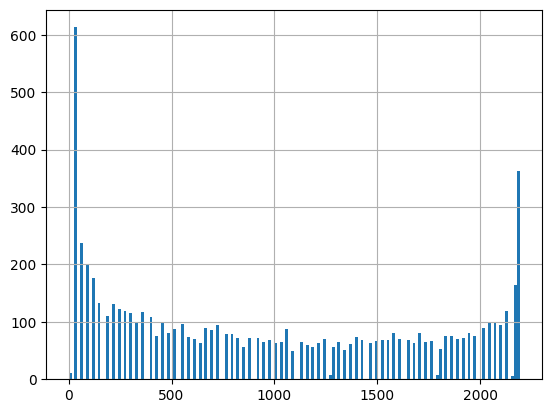

In [103]:
df['term'].hist(bins=(len(set(df['term']))))

In [104]:
df.query('term < 10')

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,term
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),...,NaN,DSL,Yes,No,Yes,Yes,Yes,No,NaN,0
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),...,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,One year,Yes,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0


In [105]:
df.query('type == "Two year" & term < 100')

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,term
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),...,NaN,DSL,Yes,No,Yes,Yes,Yes,No,NaN,0
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
869,0323-XWWTN,Male,0,No,Yes,2019-11-01,2020-02-01,Two year,Yes,Mailed check,...,121.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,92
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),...,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,0
2828,8559-WNQZS,Male,0,No,No,2020-01-01,2020-02-01,Two year,No,Mailed check,...,20.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,31
3193,1407-DIGZV,Female,0,Yes,Yes,2019-11-01,2020-02-01,Two year,No,Mailed check,...,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,92
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
3412,4854-SSLTN,Male,0,Yes,Yes,2019-12-01,2020-02-01,Two year,No,Mailed check,...,130.50,DSL,Yes,Yes,No,Yes,No,No,No,62


In [106]:
df['target'] = np.where((df['end_date'] != 'No'), 0, 1)

In [107]:
df['target'].sum() / len(df['target'])

0.0

In [108]:
df['begin_date']

0      2020-01-01
1      2017-04-01
2      2019-10-01
3      2016-05-01
4      2019-09-01
          ...    
7038   2018-02-01
7039   2014-02-01
7040   2019-03-01
7041   2019-07-01
7042   2014-08-01
Name: begin_date, Length: 7043, dtype: datetime64[ns]

In [109]:
df['end_date'].min()

Timestamp('2019-10-01 00:00:00')

In [110]:
df.loc[df['end_date'] != 'No']

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,term,target
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,...,DSL,No,Yes,No,No,No,No,NaN,31,0
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,...,DSL,Yes,No,Yes,No,No,No,No,1036,0
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,...,DSL,Yes,Yes,No,No,No,No,No,61,0
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),...,DSL,Yes,No,Yes,Yes,No,No,NaN,1371,0
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,...,Fiber optic,No,No,No,No,No,No,No,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,2018-02-01,2020-02-01,One year,Yes,Mailed check,...,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,730,0
7039,2234-XADUH,Female,0,Yes,Yes,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2191,0
7040,4801-JZAZL,Female,0,Yes,Yes,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,...,DSL,Yes,No,No,No,No,No,NaN,337,0
7041,8361-LTMKD,Male,1,Yes,No,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,...,Fiber optic,No,No,No,No,No,No,Yes,123,0


In [111]:
df.loc[df['end_date'] != 'No']['end_date'] = df.loc[df['end_date'] != 'No']['end_date'].dt.strftime('%Y-%m')

In [112]:
df['end_date'].dt.to_period('M')

0       2020-02
1       2020-02
2       2019-12
3       2020-02
4       2019-11
         ...   
7038    2020-02
7039    2020-02
7040    2020-02
7041    2019-11
7042    2020-02
Name: end_date, Length: 7043, dtype: period[M]

In [113]:
df['end_date'].dt.strftime('%Y-%m', errors='ignore')

TypeError: DatetimeIndex.strftime() got an unexpected keyword argument 'errors'

<AxesSubplot: xlabel='begin_date'>

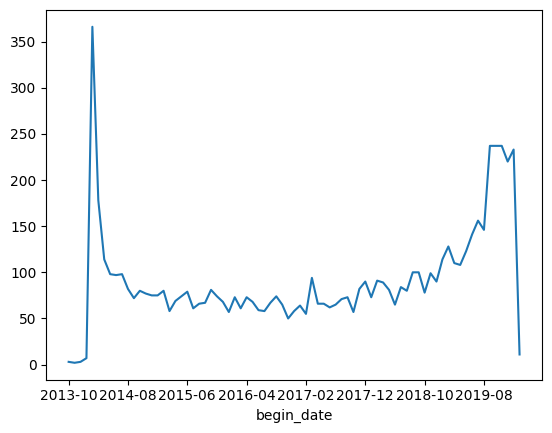

In [ ]:
df.groupby('begin_date')['customer_id'].count().plot()

<AxesSubplot: xlabel='end_date'>

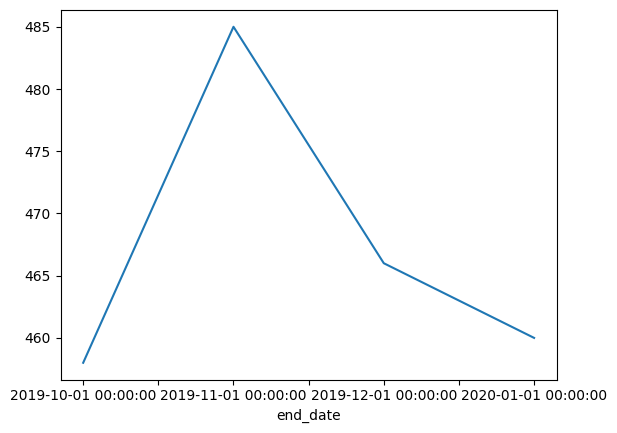

In [ ]:
df.query('end_date != "No"').groupby('end_date')['customer_id'].count().plot()

In [ ]:
df['end_date']

0                        No
1                        No
2       2019-12-01 00:00:00
3                        No
4       2019-11-01 00:00:00
               ...         
7038                     No
7039                     No
7040                     No
7041    2019-11-01 00:00:00
7042                     No
Name: end_date, Length: 7043, dtype: object

In [ ]:
##TODO check id in diff df
##TODO def if two unique change to 1&0
##TODO SeniorCitizen Partner Dependents
##TODO check date popular registration
